# 数量化三類
各アーティストが好きかどうかのアンケートの結果からアーティストの類似度と、回答者の類似度を可視化する

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import seaborn as sns

In [3]:
# 元データ
like = pd.read_csv("C:/Users/kisho/Documents/csv/like_artist/like_artist_binary_data.csv")
like

,id,sex,age,like,familiar,instrument,iyowa,kitani,gesu,ztmy,...,kimi,kiro,haruno,koba,yoh,hata,gen,hakushi,bungaku,hitsu
0,1,1,16,7,4,1,0,1,0,1,...,1,0,1,0,0,0,0,1,1,1
1,2,0,19,7,5,2,0,1,0,0,...,1,0,1,0,1,0,0,0,1,1
2,3,0,20,7,5,2,1,1,0,0,...,1,0,1,1,1,0,0,0,0,1
3,4,0,20,7,1,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,19,5,4,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,0,21,7,3,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,21,7,4,1,0,1,1,1,...,1,1,1,1,1,0,0,1,0,1
7,8,1,20,5,2,1,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
8,9,0,20,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,0,20,6,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 数量化三類の計算


In [4]:
# 各回答者の各アーティストに対する反応データ
M = like.drop(like.columns[:6], axis=1)
M

,iyowa,kitani,gesu,ztmy,sungho,nulut,keina,hitorie,fuji,fre,...,kimi,kiro,haruno,koba,yoh,hata,gen,hakushi,bungaku,hitsu
0,0,1,0,1,1,1,0,0,1,0,...,1,0,1,0,0,0,0,1,1,1
1,0,1,0,0,0,0,0,1,0,0,...,1,0,1,0,1,0,0,0,1,1
2,1,1,0,0,1,1,1,0,0,0,...,1,0,1,1,1,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
6,0,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,0,0,1,0,1
7,0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# 各列の和
item_sum = M.sum(axis=0)
item_sum

iyowa       1
kitani     11
gesu        7
ztmy        6
sungho      5
           ..
hata        2
gen         5
hakushi     4
bungaku     3
hitsu       5
Length: 83, dtype: int64

In [6]:
# itemの対角行列
item = np.diag(item_sum)
item

array([[ 1,  0,  0, ...,  0,  0,  0],
       [ 0, 11,  0, ...,  0,  0,  0],
       [ 0,  0,  7, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  4,  0,  0],
       [ 0,  0,  0, ...,  0,  3,  0],
       [ 0,  0,  0, ...,  0,  0,  5]], dtype=int64)

In [7]:
# itemの対角行列の-1/2乗
item_half_inv = np.diag(item_sum ** (-1/2))
item_half_inv

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.30151134, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.37796447, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.5       , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.57735027,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.4472136 ]])

In [8]:
# 各行の和
sample_sum = M.sum(axis=1)
sample_sum

0     27
1     26
2     34
3      3
4      7
5      5
6     56
7     16
8      1
9      2
10     3
11     2
12     4
13     3
14     8
15    10
16    24
17    41
18     1
19    20
20     6
21    10
22    12
dtype: int64

In [9]:
# sampleの対角行列
sample = np.diag(sample_sum)
sample

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0],
       [ 0, 26,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 34,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  7,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 56,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 16,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,

In [10]:
# sampleの逆行列
sample_inv = np.linalg.inv(sample)
sample_inv

array([[0.03703704, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.03846154, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.02941176, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.333

In [11]:
# X = item**(-1/2) * M.T * sample.inv * M * item**(-1/2)
X = np.dot(np.dot(np.dot(np.dot(item_half_inv, M.T), sample_inv), M), item_half_inv)
print(X)
print(X.shape)

[[0.02941176 0.00886798 0.         ... 0.         0.         0.01315334]
 [0.00886798 0.05704681 0.02903116 ... 0.02137481 0.01738841 0.01984274]
 [0.         0.02903116 0.11972582 ... 0.0197954  0.00532239 0.00714111]
 ...
 [0.         0.02137481 0.0197954  ... 0.03544611 0.01773253 0.01772854]
 [0.         0.01738841 0.00532239 ... 0.01773253 0.03329627 0.02579118]
 [0.01315334 0.01984274 0.00714111 ... 0.01772854 0.02579118 0.02943155]]
(83, 83)


In [12]:
# Xの固有値と固有ベクトルを求める
eigen_value, eigen_vector = np.linalg.eig(X)

In [13]:
# 複素数型の虚部を取り除く
eigen_value = eigen_value.astype(np.float64)
eigen_vector = eigen_vector.astype(np.float64)

print("===============固有値===============")
print(eigen_value.round(3))
print("===============固有ベクトル===============")
print(eigen_vector.round(3))

===============固有値===============
[ 1.     0.503  0.472  0.402  0.357  0.308  0.282  0.266  0.217  0.218
  0.202  0.171  0.154  0.129  0.126  0.113  0.096  0.064  0.059  0.074
  0.081  0.04   0.02  -0.    -0.     0.     0.     0.     0.     0.
  0.     0.     0.    -0.    -0.    -0.    -0.    -0.     0.     0.
 -0.    -0.    -0.    -0.    -0.     0.     0.     0.     0.     0.
  0.     0.     0.    -0.    -0.    -0.    -0.    -0.    -0.    -0.
  0.     0.     0.     0.    -0.    -0.    -0.    -0.     0.     0.
  0.    -0.    -0.     0.     0.     0.     0.    -0.    -0.    -0.
 -0.    -0.    -0.   ]
===============固有ベクトル===============
[[-0.056 -0.035 -0.013 ...  0.    -0.    -0.   ]
 [-0.185 -0.03   0.024 ... -0.     0.     0.   ]
 [-0.148  0.047  0.038 ... -0.    -0.    -0.   ]
 ...
 [-0.112 -0.077  0.031 ... -0.     0.     0.   ]
 [-0.097 -0.089  0.035 ... -0.     0.     0.   ]
 [-0.125 -0.094  0.02  ... -0.     0.     0.   ]]


<ipython-input-13-a5add59d6402>:2: ComplexWarning: Casting complex values to real discards the imaginary part
  eigen_value = eigen_value.astype(np.float64)
<ipython-input-13-a5add59d6402>:3: ComplexWarning: Casting complex values to real discards the imaginary part
  eigen_vector = eigen_vector.astype(np.float64)


In [14]:
# 第一固有値、第一固有ベクトルを除外
eigen_value = eigen_value[1:]
print(eigen_value.round(3))
eigen_vector = eigen_vector[1:, :]
print(eigen_vector.round(3))

[ 0.503  0.472  0.402  0.357  0.308  0.282  0.266  0.217  0.218  0.202
  0.171  0.154  0.129  0.126  0.113  0.096  0.064  0.059  0.074  0.081
  0.04   0.02  -0.    -0.     0.     0.     0.     0.     0.     0.
  0.     0.    -0.    -0.    -0.    -0.    -0.     0.     0.    -0.
 -0.    -0.    -0.    -0.     0.     0.     0.     0.     0.     0.
  0.     0.    -0.    -0.    -0.    -0.    -0.    -0.    -0.     0.
  0.     0.     0.    -0.    -0.    -0.    -0.     0.     0.     0.
 -0.    -0.     0.     0.     0.     0.    -0.    -0.    -0.    -0.
 -0.    -0.   ]
[[-0.185 -0.03   0.024 ... -0.     0.     0.   ]
 [-0.148  0.047  0.038 ... -0.    -0.    -0.   ]
 [-0.137  0.054  0.023 ... -0.     0.     0.   ]
 ...
 [-0.112 -0.077  0.031 ... -0.     0.     0.   ]
 [-0.097 -0.089  0.035 ... -0.     0.     0.   ]
 [-0.125 -0.094  0.02  ... -0.     0.     0.   ]]


In [15]:
# itemのカテゴリー数量の第一ベクトルを計算
item_vector_1 = np.dot(item_half_inv, eigen_vector[0])
item_vector_1.round(2)

array([-0.19, -0.01,  0.01, -0.  , -0.  , -0.02, -0.04, -0.04, -0.05,
        0.06, -0.04, -0.04, -0.02, -0.01,  0.04, -0.03, -0.04,  0.07,
        0.01,  0.02, -0.03,  0.05, -0.11,  0.18,  0.04, -0.03, -0.02,
       -0.03, -0.02, -0.02, -0.16, -0.12,  0.08, -0.03, -0.  , -0.  ,
       -0.05, -0.03,  0.06,  0.06, -0.03, -0.05, -0.07, -0.07, -0.05,
        0.04, -0.03, -0.04, -0.01, -0.04, -0.01,  0.04,  0.02, -0.05,
       -0.03,  0.07,  0.05,  0.05,  0.07, -0.02, -0.02, -0.02, -0.02,
       -0.02,  0.03,  0.03, -0.07, -0.05, -0.02, -0.01, -0.01,  0.05,
        0.05,  0.03, -0.03, -0.  , -0.  ,  0.  ,  0.  , -0.  , -0.  ,
        0.  ,  0.  ])

In [16]:
# itemのカテゴリー数量の第二ベクトルを計算
item_vector_2 = np.dot(item_half_inv, eigen_vector[1])
item_vector_2.round(3)

array([-0.148,  0.014,  0.014,  0.075,  0.081, -0.03 , -0.056, -0.114,
       -0.047, -0.195,  0.001, -0.045,  0.02 , -0.016,  0.121, -0.005,
        0.082, -0.029, -0.046,  0.084,  0.055, -0.115, -0.288, -0.026,
        0.033,  0.053, -0.003, -0.006, -0.014, -0.014, -0.013, -0.009,
       -0.007, -0.042,  0.022,  0.016,  0.049,  0.028,  0.055,  0.055,
        0.003,  0.015,  0.024, -0.034, -0.024,  0.001, -0.017, -0.025,
       -0.004, -0.013, -0.003, -0.001, -0.   , -0.043, -0.022,  0.027,
        0.019,  0.014,  0.02 ,  0.014, -0.018, -0.018, -0.004, -0.003,
        0.029,  0.029, -0.01 , -0.007, -0.032, -0.004, -0.003,  0.023,
        0.023,  0.022, -0.001, -0.   ,  0.   ,  0.   ,  0.   , -0.   ,
       -0.   , -0.   , -0.   ])

In [17]:
# sampleのカテゴリー数量の第一、第二ベクトルを計算
sample_vector_1 = np.dot(np.dot(sample_inv, M), item_vector_1) / eigen_value[0]
sample_vector_2 = np.dot(np.dot(sample_inv, M), item_vector_2) / eigen_value[1]

print(sample_vector_1)
print(sample_vector_2)

[-0.03327067 -0.02797526 -0.02026634 -0.08089822  0.04457139  0.01675535
  0.00144588  0.01629376 -0.07913449  0.01483215  0.14850743 -0.03956724
  0.00361245  0.03729839  0.07063304 -0.0144293  -0.00092308 -0.02698454
 -0.09281449 -0.01301602  0.00061321 -0.02198844  0.01025415]
[ 0.0281188   0.00548891  0.00455996 -0.03671912  0.01373247 -0.08948689
  0.00136495  0.03248634 -0.09464403 -0.11993811 -0.00723971 -0.04732202
  0.04487717 -0.08421479 -0.04867793  0.00881377  0.01357333  0.01075689
 -0.10021828 -0.03334578 -0.04568336  0.01063042 -0.06301542]


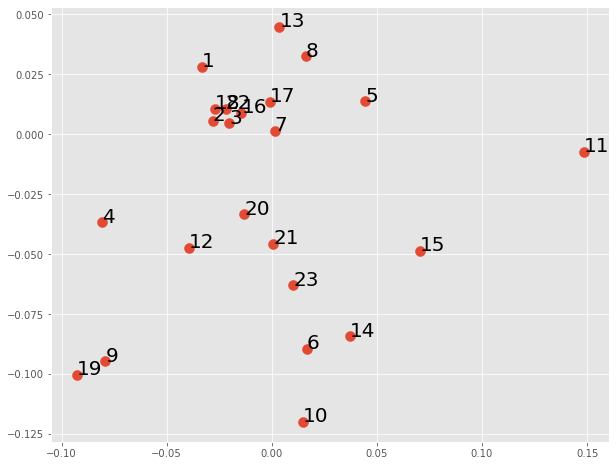

In [29]:
# sampleの散布図
ids = list(range(1, 24, 1))

fig, ax = plt.subplots(figsize=(10, 8))
plt.scatter(sample_vector_1, sample_vector_2, s=100)

for i, label in enumerate(ids):
    ax.annotate(label, (sample_vector_1[i], sample_vector_2[i]), size=20)

plt.show()

In [99]:
M.columns

Index(['iyowa', 'kitani', 'gesu', 'ztmy', 'sungho', 'nulut', 'keina',
       'hitorie', 'fuji', 'fre', 'yorushika', 'back_number', 'colormal', 'eve',
       'sou', 'gyoson', 'indigo', 'mao', 'mega', 'merc', 'mi8k', 'hige',
       'minami', 'gnu', 'utubo', 'mer', 'rim', 'popoq', 'pc', 'mitsume',
       'acidman', 'yukichi', 'vau', 'yoasobi', 'bin', 'kamiya', 'pool',
       'shimpai', 'rsd', 'sekai', 'sori', '16g', 'peo', 'mota', '23ki',
       'polka', 'lyu', 'yuzu', 'yonezu', 'kore', 'boku', 'makoto', 'sakana',
       'koyori', 'outo', 'neko', 'rokuro', 'shizima', 'maigo', 'polis',
       'gyari', 'nakya', 'natsu', 'picon', 'mikito', 'nayu', 'sena', 'gui',
       'delta', 'loin', 'gohan', 'c4', 'ribu', 'kimi', 'kiro', 'haruno',
       'koba', 'yoh', 'hata', 'gen', 'hakushi', 'bungaku', 'hitsu'],
      dtype='object')

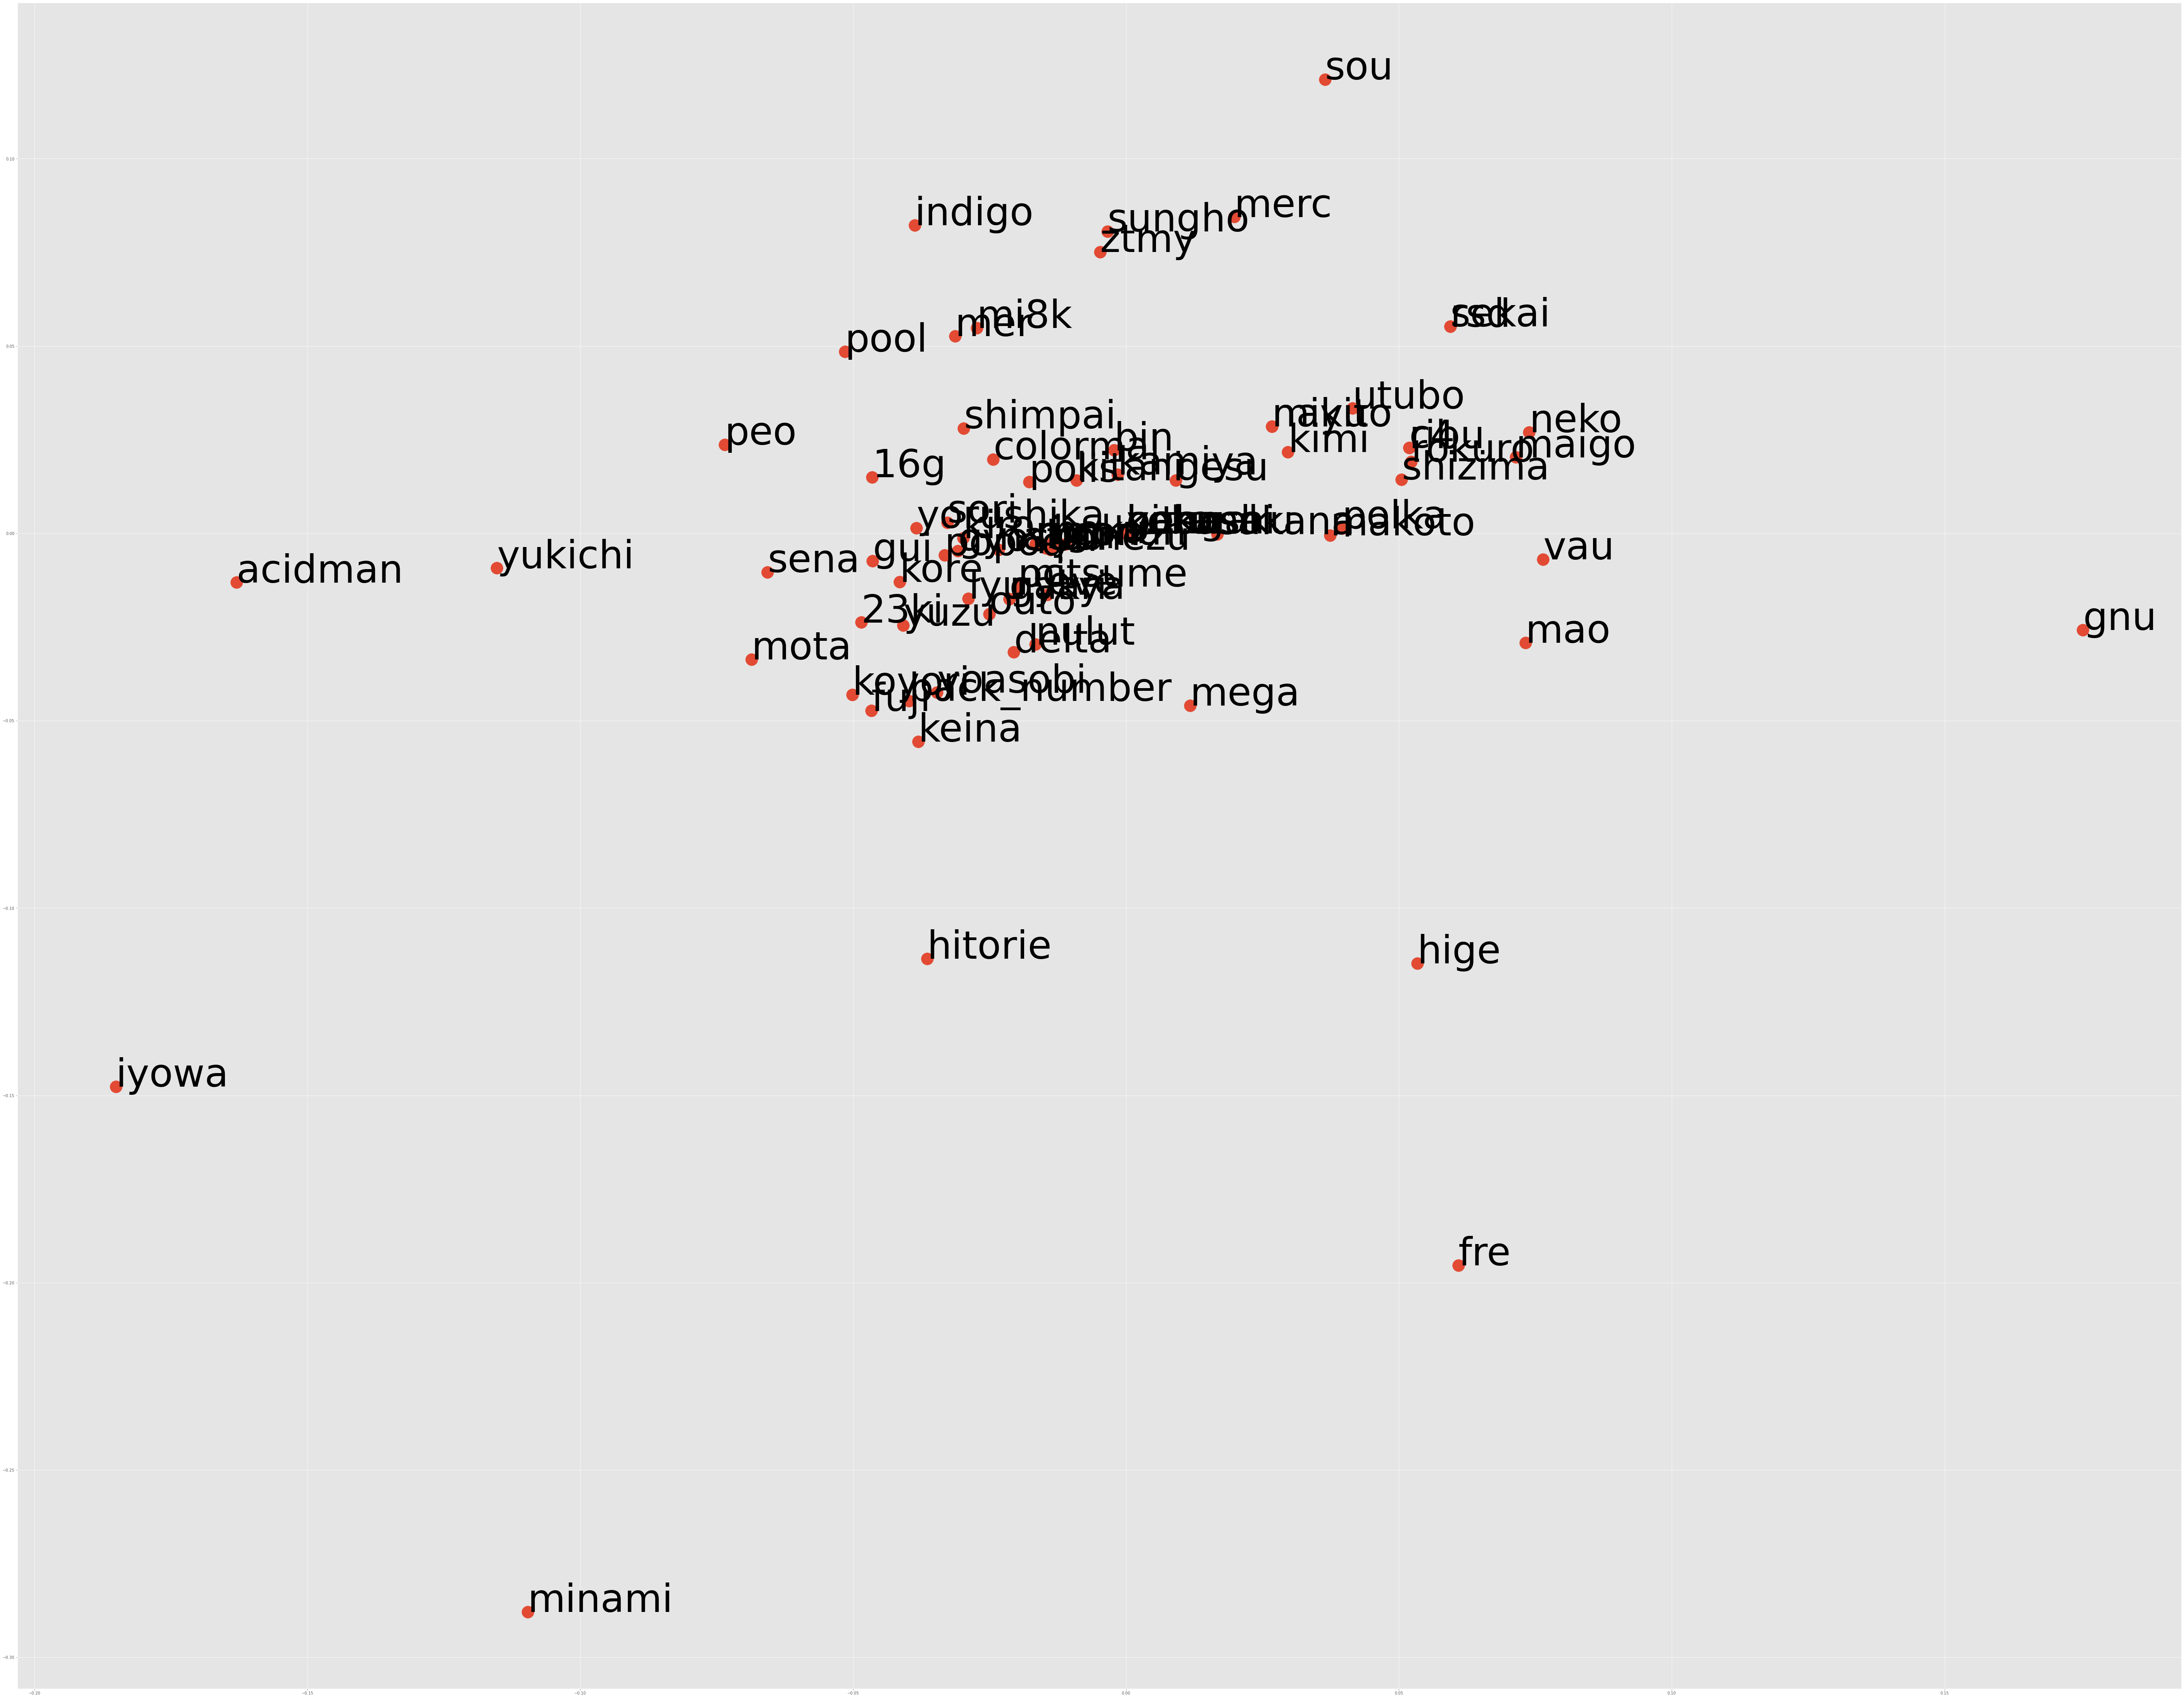

In [120]:
artists = M.columns

fig, ax = plt.subplots(figsize=(100, 80))
plt.scatter(item_vector_1, item_vector_2, s=1000)

for i, label in enumerate(artists):
    ax.annotate(label, (item_vector_1[i], item_vector_2[i]), size=100)

plt.show()

結果の解釈は少し難しい  
アンケート対象が自分のTwitterの音楽専用アカウントのフォロワーだったから、  
好みの似ているフォロワーが多く、その結果、アーティストの好まれ方も似通る結果になっている。  
中心から離れているアーティストは自分のフォロワー界隈の中ではあまり人気のないアーティストといえる。